## Final Project Submission

Please fill out:
* Student name: Sharon Sonia Atieno
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
##Assunptions write here
##define each column 

In [2]:
#importing python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#loading our dataset
df = pd.read_csv("bom.movie_gross.csv.gz")
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
#familiarizing with our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
df.shape

(3387, 5)

In [6]:
df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [7]:
##Dataset Cleaning

In [8]:
#check for duplicates
df.duplicated().value_counts()

False    3387
dtype: int64

In [9]:
##We do not have any duplicates 

In [10]:
#check for missing values 
df.isna().value_counts()

title  studio  domestic_gross  foreign_gross  year 
False  False   False           False          False    2007
                               True           False    1349
               True            False          False      26
       True    True            False          False       2
               False           False          False       2
                               True           False       1
dtype: int64

In [11]:
df['domestic_gross'].isna().value_counts()

False    3359
True       28
Name: domestic_gross, dtype: int64

In [12]:
df['foreign_gross'].isna().value_counts()

False    2037
True     1350
Name: foreign_gross, dtype: int64

In [13]:
#dropping missing values
df.dropna(how = 'any', subset =['domestic_gross'], inplace = True)

In [14]:
df.shape

(3359, 5)

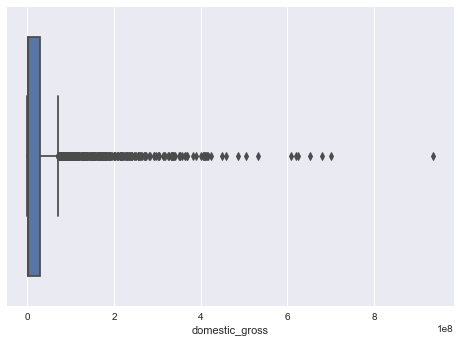

In [15]:
#checking for outliers 
sns.boxplot(data=df, x="domestic_gross");


In [16]:
##There are outliers in domestic gross but since they are genuine we will not remove them

In [17]:
type(df['foreign_gross'])

pandas.core.series.Series

In [18]:
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [19]:
#setting our column title to be the index of our dataset 
df.set_index('title')

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...
The Quake,Magn.,6200.0,NaN,2018
Edward II (2018 re-release),FM,4800.0,NaN,2018
El Pacto,Sony,2500.0,NaN,2018


In [20]:
df['foreign_gross'].isna().value_counts()

False    2009
True     1350
Name: foreign_gross, dtype: int64

In [21]:
#converting column foreign cross from object to a numeric value
df['foreign_gross'] = df['foreign_gross'].apply(pd.to_numeric, errors='coerce')
df['foreign_gross'].fillna(df['foreign_gross'].median(),inplace=True)
df['foreign_gross'].isna().value_counts()

False    3359
Name: foreign_gross, dtype: int64

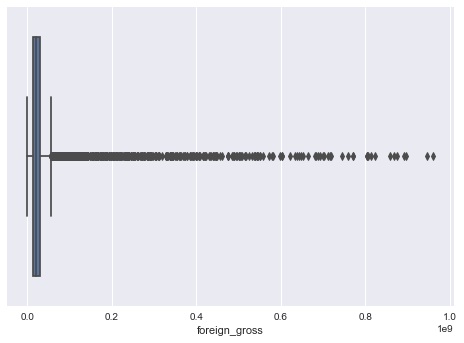

In [22]:
sns.boxplot(data=df, x="foreign_gross");

In [23]:
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [27]:
#assigning variables to column domestic gross and foreign gross
x = df['domestic_gross']
y = df['foreign_gross']

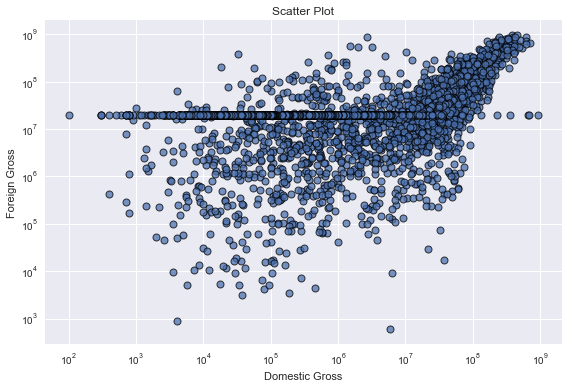

In [62]:
#testing correlation between foreign gross and domestic column
plt.style.use('seaborn')
plt.scatter(x, y , edgecolor='black', linewidth=1, alpha=0.75)

#using a log scale to lessen how much outliers are skewing 
#the plot

plt.xscale('log')
plt.yscale('log')

plt.title('Scatter Plot')
plt.xlabel('Domestic Gross')
plt.ylabel('Foreign Gross')
plt.tight_layout()

In [ ]:
##The two variables have a positive linear relationship 
#Strong correlation to the left side of the plot than the right side
#As domestic gross goes up so does foreign gross 
#An increase in revenue in the foreign market means an adjacent increase in revenue in the domestic market 

In [ ]:
#using historical data to make future predictions on revenue based on past trends 

In [ ]:
#studying trends of the data set using a line graph 

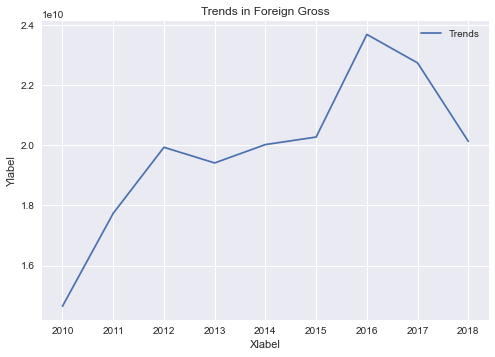

In [57]:
lineplot = sns.lineplot(data=df, x='year', y='foreign_gross', ci=None, estimator=sum)

lineplot.set(xlabel = 'Xlabel')
lineplot.set(ylabel = 'Ylabel')
lineplot.set(title = 'Trends in Foreign Gross')
plt.legend(['Trends']);

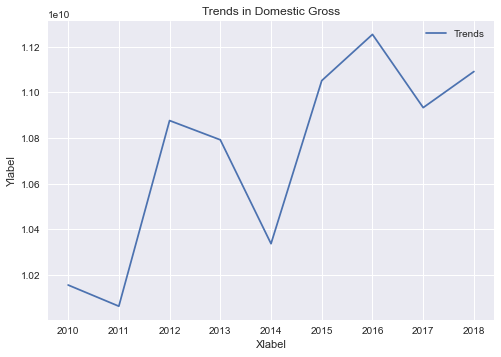

In [58]:
lineplot = sns.lineplot(data=df, x='year', y='domestic_gross', ci=None, estimator=sum)

lineplot.set(xlabel = 'Xlabel')
lineplot.set(ylabel = 'Ylabel')
lineplot.set(title = 'Trends in Domestic Gross')
plt.legend(['Trends']);

In [ ]:
#based on the trend of our domestic gross and foreign gross line graph we notice 
#that as the years go by there is a flunctuation in revenue but it keeps on incresing as opposed to previuos years
#total revenue income sometimes can drop but it springs back up 
#this in turn reflects on the resiliency of the film market 
#thus we already know the market is not going to be always dormant or continously generate negative sales